# Support Vector Machines
---

In this notebook, we discuss some details about support vector machines, tuning hyperparameters of such models, and using kernels to fit non-linear decision boundaries.

Support Vector Machines (SVM) is a classifier that is trained using the hinge loss alongside L2 regularization.

Support vectors are those examples that aren't in the flat part of the hinge loss diagram, they are either wrongly-classified examples or examples that are very close to the decision boundary. Where other examples are not support vectors in which if one of them is to be removed, it wouldn't affect the boundary.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data[:, :2], wine.target

In [4]:
from sklearn.svm import SVC

In [5]:
svm = SVC(kernel="linear")
svm.fit(X, y)

SVC(kernel='linear')

We can plot the results using our classifier visualization functions

In [6]:
import numpy as np

def make_meshgrid(X, y, step = 0.02):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

def plot_contours(ax, classifier, xx, yy, **params_kwargs):
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params_kwargs)
    return out

(0.0, 6.0)

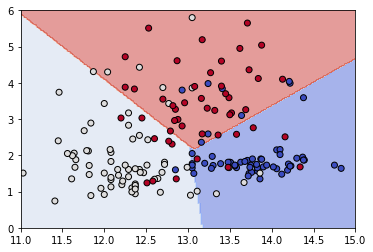

In [14]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")
ax.set_xlim(11, 15)
ax.set_ylim(0, 6)

We can access the support vectors of the model using the `support_` member which returns the indexes of the examples used as support vectors.

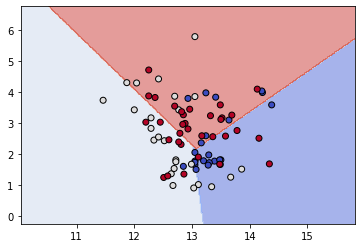

In [15]:
fig, ax = plt.subplots()
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0[svm.support_], X1[svm.support_], c=y[svm.support_], cmap=plt.cm.coolwarm, edgecolors="black")

# Kernels in SVM

Kernels are very useful when fitting SVMs to generate non-liear decision boundaries for such non-linearly separable data. Kernels are used to **transform** the data from a space in which the data is non-linearly separable to a new space where we can linearly separate the data using a linear decision boundary. 

One of the most used kernels the [*RBF* (radial-basis function) kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel), which is the default kernel in `SVC` sklearn class.

In [23]:
svm_rbf = SVC(gamma = 1) # rbf is the default kernel
svm_rbf.fit(X, y)

SVC(gamma=1)

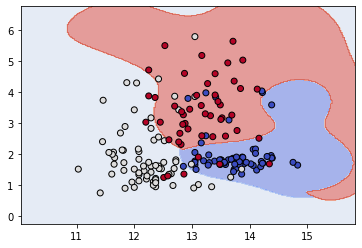

In [24]:
fig, ax = plt.subplots()
plot_contours(ax, svm_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")

`gamma` is a hyperparameter when using the RBF kernel that determines the smootheness of the clusters. The higher `gamma`, the higher complex decision boundary is formulated which may lead to overfitting and vice versa for small values for `gamma`.

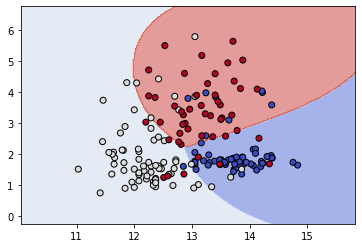

In [25]:
svm_rbf = SVC(gamma = 0.1) # small gamma means smooth boundaries
svm_rbf.fit(X, y)
fig, ax = plt.subplots()
plot_contours(ax, svm_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")

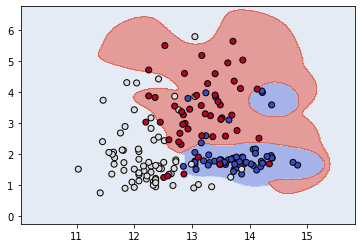

In [27]:
svm_rbf = SVC(gamma = 5) # large gamma means complex boundaries
svm_rbf.fit(X, y)
fig, ax = plt.subplots()
plot_contours(ax, svm_rbf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")

We can build a grid search over the optimal value for the hyperparameter `gamma` and for the regularization hyperparameter `C`.

In [36]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.01]
}

searcher = GridSearchCV(
    estimator = svm,
    param_grid = param_grid,
    cv = 5
)

searcher.fit(X, y)

searcher.best_params_, searcher.best_score_

({'C': 10, 'gamma': 0.01}, 0.7807936507936508)